# Parameter Space Validation
This notebook visualizes the parameter space for large parameter sampling.

In [49]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
pd.set_option("display.float_format", lambda x: f"{x:.17g}")
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import kstest

## Load Parameter Samples Text File

In [50]:
PARAM_FILE = Path("/Users/robertxpearce/Desktop/reionization-emulator/data/param_samples/params_v6.txt")

names = ["zmean", "alpha", "kb", "b0"]
bounds = {
    "zmean": (7.0, 9.0),
    "alpha": (0.10, 0.90),
    "kb":    (0.10, 2.0),
    "b0":    (0.10, 0.80),
}

X = np.loadtxt(PARAM_FILE)
df = pd.DataFrame(X, columns=names)

df.head()

,zmean,alpha,kb,b0
0,7.3246352962735042,0.48715694318495817,0.25348131624173204,0.71027093973251099
1,8.8876481881978293,0.4329503243946754,0.1020456445037486,0.24680639792154205
2,8.9863604908768142,0.12408808584551106,0.98632535613506378,0.18242852477925187
3,8.9443515168078047,0.88542898962929995,0.62679121260075399,0.57345904185678731
4,8.6421451854829492,0.15421447344911487,0.19348166225562186,0.61903728447420314


## Check Shape and Min/Max for Each Param

In [51]:
print("Shape:", df.shape)

for n in names:
    lo, hi = bounds[n]
    mn, mx = df[n].min(), df[n].max()
    print(f"{n:5s} \t min={mn:.17g} \t max={mx:.17g} \t bounds=[{lo},{hi}] in_bounds={mn>=lo and mx<=hi}")

Shape: (1000, 4)
zmean 	 min=7.0001653516969311 	 max=8.9989813358947703 	 bounds=[7.0,9.0] in_bounds=True
alpha 	 min=0.10033744993224193 	 max=0.89977658030190388 	 bounds=[0.1,0.9] in_bounds=True
kb    	 min=0.10002195440910143 	 max=1.9981174401204842 	 bounds=[0.1,2.0] in_bounds=True
b0    	 min=0.10014048436750736 	 max=0.79980736938333663 	 bounds=[0.1,0.8] in_bounds=True


## Extract Parameter Set(s)

In [52]:
param_set = [11, 255, 342, 384, 507, 531, 609, 651, 714, 742, 746, 755, 788, 832, 835, 911, 938] # Failed Sims
print(df.iloc[param_set].to_string())

                 zmean               alpha                  kb                  b0
11  7.2976527367276489 0.52294980619499942  1.3919724984940991 0.79647721365487545
255 8.0040677075290816 0.74539725729159279  1.8369837082499978 0.43723834567953235
342 7.1750608497557167 0.64567221347899451 0.53919497874586586 0.59804843423281029
384 8.6887242480850233 0.17348432725433863  1.4085501329321362 0.33601969002093812
507  7.062315927322798 0.82516697976514852 0.41960776141730716 0.60774049611994296
531  8.053851526924328 0.50451164206822641 0.33841932296235566 0.35346420295398229
609 7.0395005735963032 0.41966678419219072 0.79412513449981514 0.14234984686200758
651 7.5095497778033877 0.35157901670199232 0.58573646491677533  0.4327686425289955
714 7.0993410030244846 0.23584124260279812  1.7261044965596559 0.28607131991436163
742 8.0925692032592096 0.22045240844939773  1.6551938496172334 0.40384047044001581
746 7.3340490385798134 0.68679124131104574  1.7656174798463173 0.46547217308809519
755 

## Histogram of Parameter Space
- Histograms should be flat for uniform coverage.

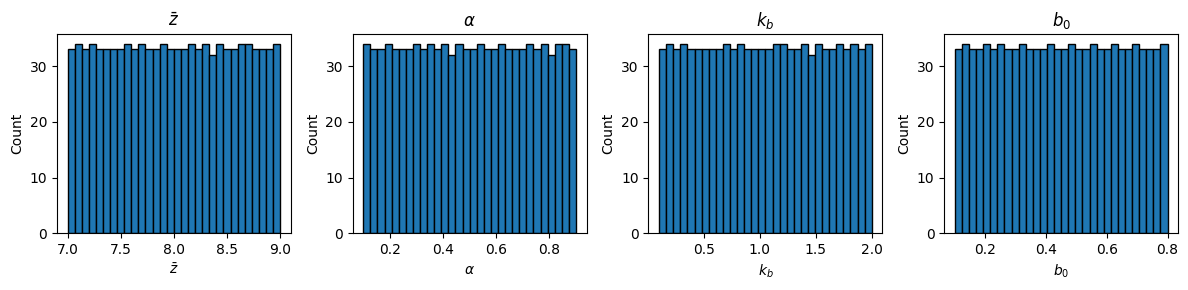

In [53]:
plt.figure(figsize=(12, 3))

columns = ["zmean", "alpha", "kb", "b0"]
labels  = [r"$\bar{z}$", r"$\alpha$", r"$k_b$", r"$b_0$"]

for i, (col, label) in enumerate(zip(columns, labels), start=1):
    plt.subplot(1, 4, i)
    plt.hist(df[col], bins=30, edgecolor="black") # Bins proportional sqrt(n)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Pairwise Coverage
Shows the space-filling behavior checking for visible correlations or clustering.

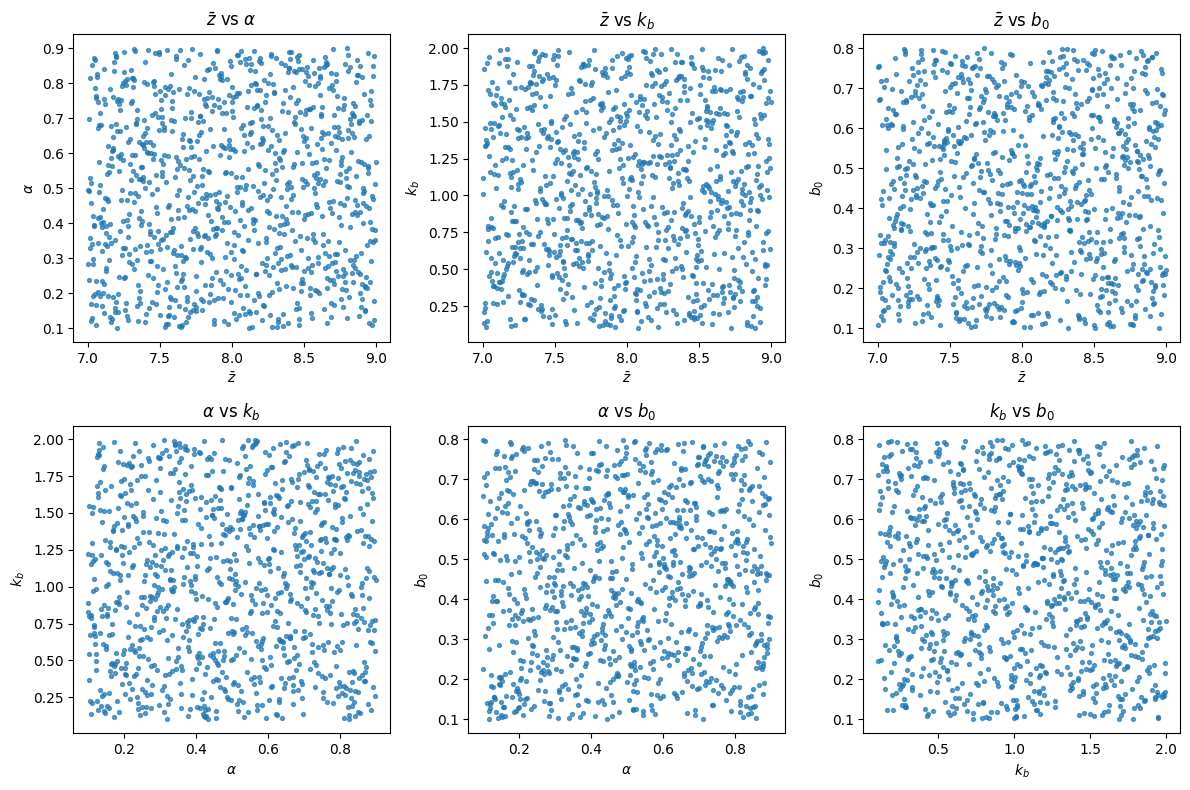

In [54]:
pairs = list(combinations(columns, 2))
pair_labels = list(combinations(labels, 2))

plt.figure(figsize=(12, 8))

for i, ((xcol, ycol), (xlabel, ylabel)) in enumerate(zip(pairs, pair_labels), start=1):
    plt.subplot(2, 3, i)
    plt.scatter(df[xcol], df[ycol], s=8, alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")

plt.tight_layout()
plt.show()

## Marginal Uniformity (Kolmogorov-Smirnov Test)  
* D: The maximum absolute difference between the empirical CDF and the CDF of the uniform distribution.
* Large p-value: Consistent with Uniform
* Small p-value: Marginal Bias

In [55]:
for n in names:
    lo, hi = bounds[n]
    u = (df[n] - lo) / (hi - lo)
    D, p = kstest(u, "uniform")
    print(f"{n:5s} KS D={D:.4f} p={p:.3f}")

zmean KS D=0.0010 p=1.000
alpha KS D=0.0010 p=1.000
kb    KS D=0.0010 p=1.000
b0    KS D=0.0010 p=1.000


## Pairwise Correlation

In [56]:
print("Pearson:\n", df[columns].corr(method="pearson"))
print()
print("Spearman:\n", df[columns].corr(method="spearman"))

Pearson:
                      zmean                alpha                    kb  \
zmean                    1  0.03381172451142208  0.022971133992557888   
alpha  0.03381172451142208                    1  0.057930063870905657   
kb    0.022971133992557888 0.057930063870905657                     1   
b0      0.0214395924583104 0.057290144082479323 -0.052977278410339466   

                         b0  
zmean    0.0214395924583104  
alpha  0.057290144082479323  
kb    -0.052977278410339466  
b0                        1  

Spearman:
                      zmean                alpha                    kb  \
zmean                    1 0.033768321768321771  0.023007635007635009   
alpha 0.033768321768321771                    1  0.057978441978441979   
kb    0.023007635007635009 0.057978441978441979                     1   
b0    0.021410373410373409 0.057306141306141305 -0.052982032982032981   

                         b0  
zmean  0.021410373410373409  
alpha  0.057306141306141305  
kb    